In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from theano import tensor as T
from scipy import stats
%matplotlib inline

# Chapter 8 - Comparing Gaussian means
## 8.1 One-sample comparison


$$ \delta \sim \text{Cauchy} (0, 1)$$
$$ \sigma \sim \text{Cauchy} (0, 1)_{\mathcal I(0,∞)}$$
$$ \mu = \delta\sigma $$
$$ x_{i} \sim \text{Gaussian}(\mu,1/\sigma^2)$$

Applied log-transform to sigma and added transformed sigma_log to model.
Assigned NUTS to delta
Assigned NUTS to sigma_log
 [-----------------100%-----------------] 3000 of 3000 complete in 1.2 sec

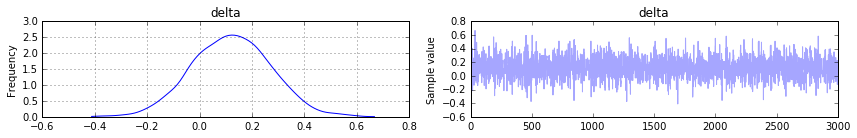

In [2]:
# Read data Dr. Smith
Winter = np.array([-0.05,0.41,0.17,-0.13,0.00,-0.05,0.00,0.17,0.29,0.04,0.21,0.08,0.37,
            0.17,0.08,-0.04,-0.04,0.04,-0.13,-0.12,0.04,0.21,0.17,0.17,0.17,
            0.33,0.04,0.04,0.04,0.00,0.21,0.13,0.25,-0.05,0.29,0.42,-0.05,0.12,
            0.04,0.25,0.12])

Summer = np.array([0.00,0.38,-0.12,0.12,0.25,0.12,0.13,0.37,0.00,0.50,0.00,0.00,-0.13,
            -0.37,-0.25,-0.12,0.50,0.25,0.13,0.25,0.25,0.38,0.25,0.12,0.00,0.00,
            0.00,0.00,0.25,0.13,-0.25,-0.38,-0.13,-0.25,0.00,0.00,-0.12,0.25,
            0.00,0.50,0.00])
x = Winter - Summer  # allowed because it is a within-subjects design
x = x / np.std(x)  

with pm.Model() as model1:
    delta = pm.Cauchy("delta",alpha=0,beta=1)
    sigma = pm.HalfCauchy("sigma",beta=1)
    miu = delta*sigma
    xi = pm.Normal("xi",mu=miu,tau=1/sigma**2,observed=x)
    trace1=pm.sample(3e3, model=model1)

burnin=0    
pm.traceplot(trace1[burnin:],varnames=['delta']);
plt.show()


delta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.122            0.150            0.003            [-0.164, 0.412]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.168         0.019          0.123          0.223          0.412

the Bayes Factor is  [ 6.22193812]


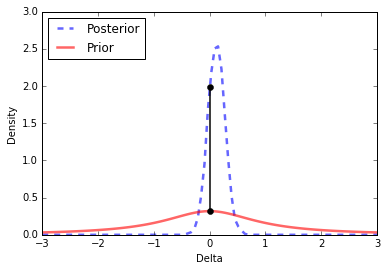

In [3]:
# BFs based on density estimation (using kernel smoothing instead of spline)
from scipy.stats.kde import gaussian_kde
from scipy.stats import cauchy

pm.summary(trace1,varnames=['delta'])
tmp = pm.df_summary(trace1,varnames=['delta'])
# 95% confidence interval:
x0 = tmp.values[0,3]
x1 = tmp.values[0,4]

t_delt = trace1['delta'][:]
my_pdf = gaussian_kde(t_delt)
x = np.linspace(-3,3, 100)
plt.plot(x,my_pdf(x),'--',lw=2.5, alpha=0.6, label='Posterior') # distribution function
plt.plot(x, cauchy.pdf(x),'r-', lw=2.5, alpha=0.6, label='Prior')
posterior = my_pdf(0)             # this gives the pdf at point delta = 0
prior     = cauchy.pdf(0)         # height of order-restricted prior at delta = 0
BF01      = posterior/prior
print ('the Bayes Factor is ',BF01)
plt.plot([0,0], [posterior,prior],'k-', [0,0], [posterior,prior],'ko',lw=1.5, alpha=1)
plt.xlabel('Delta')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

## 8.2 Order-restricted one-sample comparison


$$ \delta \sim \text{Cauchy} (0, 1)_{\mathcal I(-∞,0)}$$
$$ \sigma \sim \text{Cauchy} (0, 1)_{\mathcal I(0,∞)}$$
$$ \mu = \delta\sigma $$
$$ x_{i} \sim \text{Gaussian}(\mu,1/\sigma^2)$$

Applied log-transform to delta1 and added transformed delta1_log to model.
Applied log-transform to sigma and added transformed sigma_log to model.
Assigned NUTS to delta1_log
Assigned NUTS to sigma_log
 [-----------------100%-----------------] 3000 of 3000 complete in 3.8 sec

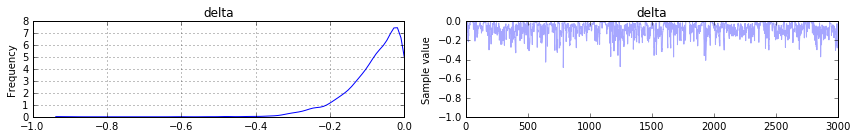

In [4]:
# Read data Dr. Smith
Winter = np.array([-0.05,0.41,0.17,-0.13,0.00,-0.05,0.00,0.17,0.29,0.04,0.21,0.08,0.37,
            0.17,0.08,-0.04,-0.04,0.04,-0.13,-0.12,0.04,0.21,0.17,0.17,0.17,
            0.33,0.04,0.04,0.04,0.00,0.21,0.13,0.25,-0.05,0.29,0.42,-0.05,0.12,
            0.04,0.25,0.12])

Summer = np.array([0.00,0.38,-0.12,0.12,0.25,0.12,0.13,0.37,0.00,0.50,0.00,0.00,-0.13,
            -0.37,-0.25,-0.12,0.50,0.25,0.13,0.25,0.25,0.38,0.25,0.12,0.00,0.00,
            0.00,0.00,0.25,0.13,-0.25,-0.38,-0.13,-0.25,0.00,0.00,-0.12,0.25,
            0.00,0.50,0.00])
x = Winter - Summer  # allowed because it is a within-subjects design
x = x / np.std(x)  

with pm.Model() as model2:
    delta1 = pm.HalfCauchy("delta1",beta=1)
    delta = pm.Deterministic("delta",-delta1)
    sigma = pm.HalfCauchy("sigma",beta=1)
    miu = delta*sigma
    xi = pm.Normal("xi",mu=miu,tau=1/sigma**2,observed=x)
    trace2=pm.sample(3e3, model=model2)

burnin=0
pm.traceplot(trace2[burnin:],varnames=['delta']);
plt.show()


delta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.084           0.079            0.004            [-0.240, -0.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.274         -0.120         -0.065         -0.026         -0.002

the Bayes Factor is  [ 15.41849282]


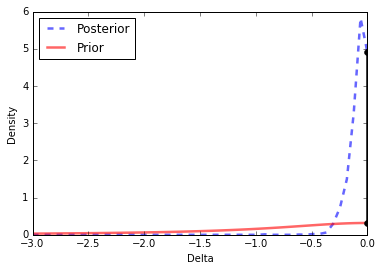

In [5]:
# BFs based on density estimation (using kernel smoothing instead of spline)
pm.summary(trace2,varnames=['delta'])
tmp = pm.df_summary(trace2,varnames=['delta'])
# 95% confidence interval:
x0 = tmp.values[0,3]
x1 = tmp.values[0,4]

t_delt = trace2['delta'][:]
my_pdf = gaussian_kde(t_delt)
x = np.linspace(-3,0, 50)
plt.plot(x,my_pdf(x),'--',lw=2.5, alpha=0.6, label='Posterior') # distribution function
plt.plot(x, cauchy.pdf(x),'r-', lw=2.5, alpha=0.6, label='Prior')
posterior = my_pdf(0)             # this gives the pdf at point delta = 0
prior     = cauchy.pdf(0)         # height of order-restricted prior at delta = 0
BF01      = posterior/prior
print ('the Bayes Factor is ',BF01)
plt.plot([0,0], [posterior,prior],'k-', [0,0], [posterior,prior],'ko',lw=1.5, alpha=1)
plt.legend(loc='upper left')
plt.xlabel('Delta')
plt.ylabel('Density')
plt.show()

## 8.3 Two-sample comparison


$$ \delta \sim \text{Cauchy} (0, 1)$$
$$ \mu \sim \text{Cauchy} (0, 1)$$
$$ \sigma \sim \text{Cauchy} (0, 1)_{\mathcal I(0,∞)}$$
$$ \alpha = \delta\sigma $$
$$ x_{i} \sim \text{Gaussian}(\mu+\frac{\alpha}{2},1/\sigma^2)$$
$$ y_{i} \sim \text{Gaussian}(\mu-\frac{\alpha}{2},1/\sigma^2)$$


Applied log-transform to sigma and added transformed sigma_log to model.
Assigned NUTS to delta
Assigned NUTS to mu
Assigned NUTS to sigma_log
 [-----------------100%-----------------] 3000 of 3000 complete in 1.2 sec

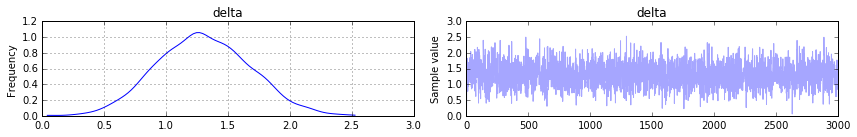

In [6]:
# Read data 
x =np.array([70,80,79,83,77,75,84,78,75,75,78,82,74,81,72,70,75,72,76,77])
y =np.array([56,80,63,62,67,71,68,76,79,67,76,74,67,70,62,65,72,72,69,71])

n1 = len(x)
n2 = len(y)

# Rescale
y = y - np.mean(x)
y = y / np.std(x)
x = (x - np.mean(x)) / np.std(x)

with pm.Model() as model3:
    delta = pm.Cauchy("delta",alpha=0,beta=1)
    mu = pm.Cauchy("mu",alpha=0,beta=1)
    sigma = pm.HalfCauchy("sigma",beta=1)
    alpha = delta*sigma
    xi = pm.Normal("xi",mu=mu+alpha/2,tau=1/sigma**2,observed=x)
    yi = pm.Normal("yi",mu=mu-alpha/2,tau=1/sigma**2,observed=y)
    trace3=pm.sample(3e3, model=model3)

burnin=0    
pm.traceplot(trace3[burnin:],varnames=['delta']);
plt.show()


delta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.304            0.374            0.008            [0.594, 2.041]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.598          1.039          1.291          1.559          2.055

the Bayes Factor is  [ 0.01371993]


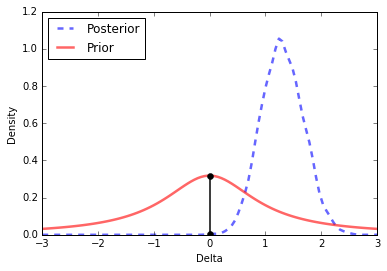

In [7]:
# BFs based on density estimation (using kernel smoothing instead of spline)
pm.summary(trace3,varnames=['delta'])
tmp = pm.df_summary(trace3,varnames=['delta'])
# 95% confidence interval:
x0 = tmp.values[0,3]
x1 = tmp.values[0,4]

t_delt = trace3['delta'][:]
my_pdf = gaussian_kde(t_delt)
x = np.linspace(-3,3, 100)
plt.plot(x,my_pdf(x),'--',lw=2.5, alpha=0.6, label='Posterior') # distribution function
plt.plot(x, cauchy.pdf(x),'r-', lw=2.5, alpha=0.6, label='Prior')
posterior = my_pdf(0)             # this gives the pdf at point delta = 0
prior     = cauchy.pdf(0)         # height of order-restricted prior at delta = 0
BF01      = posterior/prior
print ('the Bayes Factor is ',BF01)
plt.plot([0,0], [posterior,prior],'k-', [0,0], [posterior,prior],'ko',lw=1.5, alpha=1)
plt.legend(loc='upper left')
plt.xlabel('Delta')
plt.ylabel('Density')
plt.show()